# Benchmark

#### Premessa
Jupyter ha un problema con il multiprocessing (https://bugs.python.org/issue25053), causato dalla serializzazione dei dati.

Ho trovato l'unica (al momento) accettabile soluzione, che permette di non causare tale problema.
Per attuarla bisogna separare tutte le funzioni e metterle in file esterni che vengono poi importati su Jupyter.
Tuttavia in questo modo viene a meno la comprensione del codice, perciò lascierò commentato il codice sul notebook per capire quali funzioni sto richiamando.

Se possibile per questi test è meglio eseguirli direttamente come script, eseguendo il file benchmark.py.
<b>
Il visualizzatore di Jupyter rallenta le funzionalità di Python e non permette quindi di sfruttare le performance della propria macchina. Per questo motivo ho dovuto cambiare alcuni valori, per ottenere una rappresentazione dei grafici in tempi ragionevoli.
</b>

In [1]:
!pip install multiprocess requests numpy

In [2]:
# importo la libreria che ho scritto per effetture i benchmark
from libreria.utils import visualizza_grafico_combinato, tempo_di_esecuzione, info_file
from libreria.utils import visualizza_grafico, esegui_thread_processi, format_bytes
# importo le singole funzioni che serviranno per eseguire i vari contesti di utilizzo
from funzioni import io_bound_socket, io_bound_pesante, cpu_bound_pesante, gil_unbound

### I/O bound - socket

In [3]:
# import requests
#
#
# @tempo_di_esecuzione  # decoratore che permette di salvare il tempo di esecuzione della funzione
# def download(url):
#     try:
#         resp = requests.get(url)  # richiesta e download dei dati della risorsa esterna
#     except requests.exceptions.RequestException as errore:
#         print('Errore HTTP: ', errore)

In [4]:
# def io_bound_socket():
#     # url = 'https://freetestdata.com/wp-content/uploads/2021/09/Free_Test_Data_1MB_PDF.pdf'  # 1 MB
#     # url = 'https://freetestdata.com/wp-content/uploads/2021/09/500kb.png'  # 500 KB
#     url = 'https://freetestdata.com/wp-content/uploads/2021/09/Free_Test_Data_100KB_PDF.pdf'  # 100 KB
#     info_file(url)
#
#     num_urls = 16  # numero di url da scaricare
#     urls = [url for i in range(num_urls)]  # creo una lista di url da scaricare
#     esegui_thread_processi(download, urls, grafico_combinato=True, lista_thread_processi=[1, 2, 4, 8])

<Response [200]>
Le dimensioni del file sono:  100.20KB
Eseguito in 0.1543 secondi
file saved reports/1_thread_processo.png


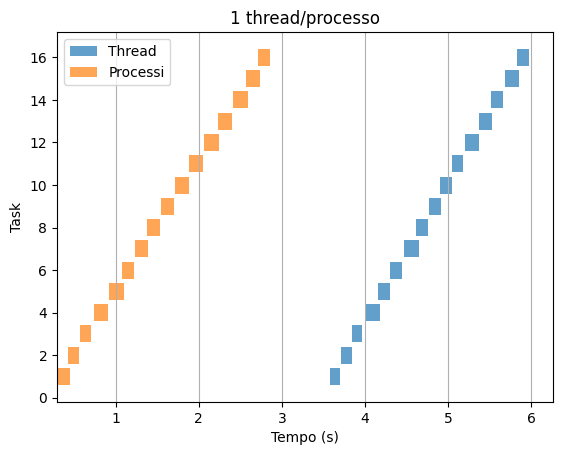

file saved reports/2_thread_processi.png


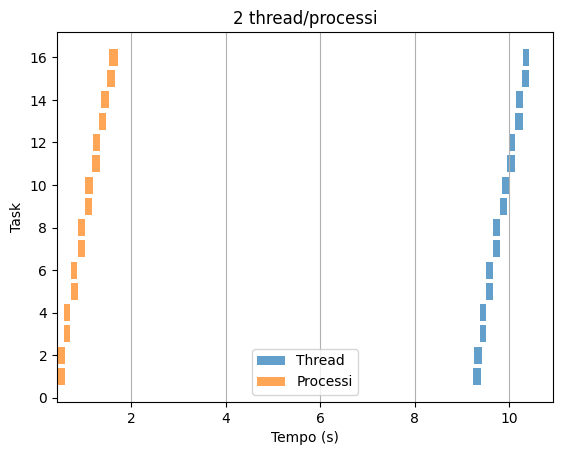

file saved reports/4_thread_processi.png


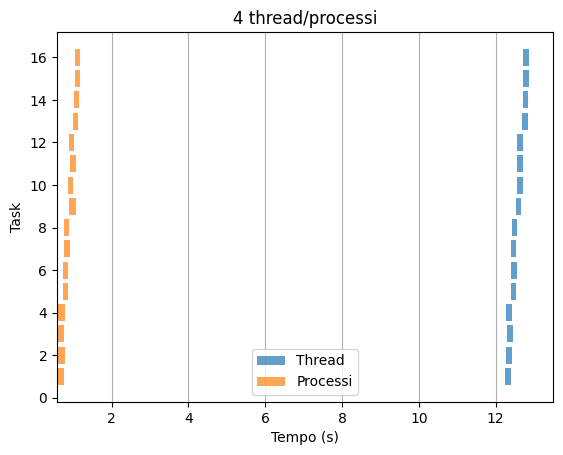

file saved reports/8_thread_processi.png


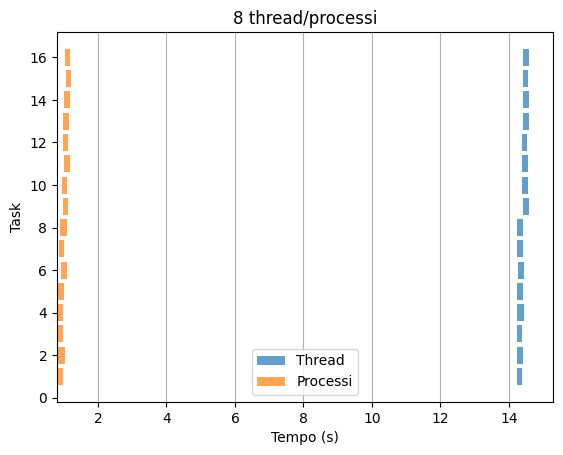

In [5]:
if __name__ == '__main__':
    io_bound_socket()

### I/O bound - scrittura su file

In [6]:
# @tempo_di_esecuzione
# def scrittura_su_file(testo):
#     try:
#         with open('reports/test.txt', 'wt', encoding='utf-8') as f:  # apro il file in scrittura
#             f.write(testo)
#     except IOError as errore:
#         print('Errore I/O: ', errore)

In [7]:
# import random, string
#
#
# def io_bound_pesante():
#     num_test = 16  # numero di test da eseguire
#     testo = ''.join(random.choice(string.ascii_lowercase) for i in range(10 ** 7 * 2))
#     print("Dimensioni del testo: ", format_bytes(len(testo)))
#     test = [testo for i in range(num_test)]  # creo una lista di test da eseguire
#     esegui_thread_processi(scrittura_su_file, test)

Dimensioni del testo:  95.37MB
file saved reports/1_thread_processo.png


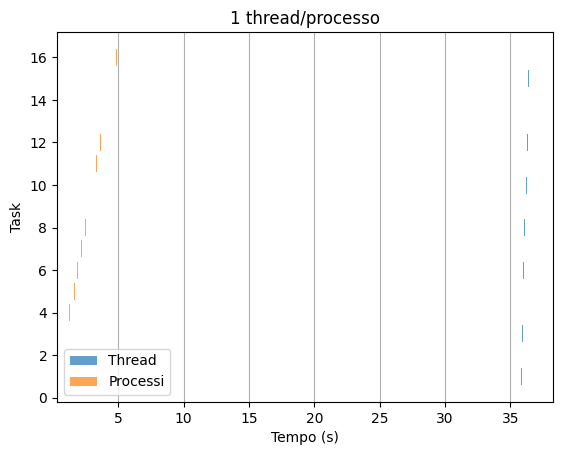

file saved reports/2_thread_processi.png


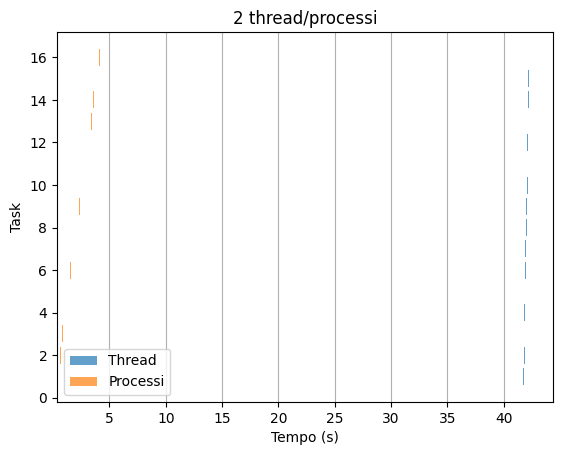

file saved reports/4_thread_processi.png


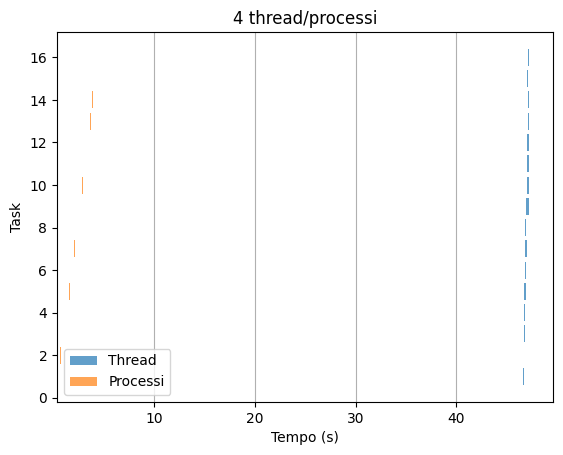

file saved reports/8_thread_processi.png


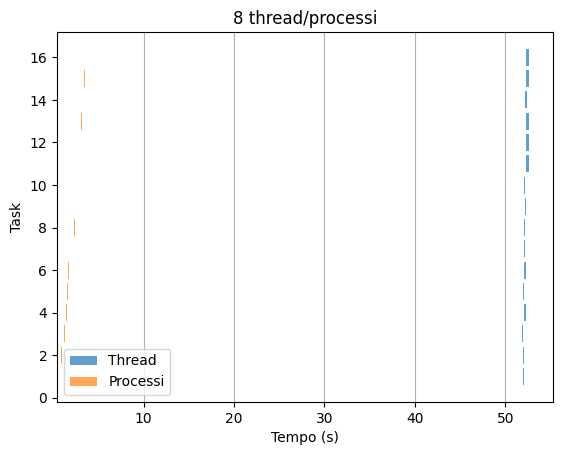

In [3]:
if __name__ == '__main__':
    io_bound_pesante()

### CPU bound - calcolo pesante

In [9]:
# @tempo_di_esecuzione
# def aggiungi_a_lista(num):
#     lista = []
#     for n in range(num):
#         lista.append(random.random())

In [10]:
# def cpu_bound_pesante():
#     num_test = 16  # numero di test da eseguire
#     test = [10 ** 7 for i in range(num_test)]  # creo una lista di test da eseguire
#     esegui_thread_processi(aggiungi_a_lista, test, grafico_combinato=True, lista_thread_processi=[1, 2, 4, 8])

file saved reports/1_thread_processo.png


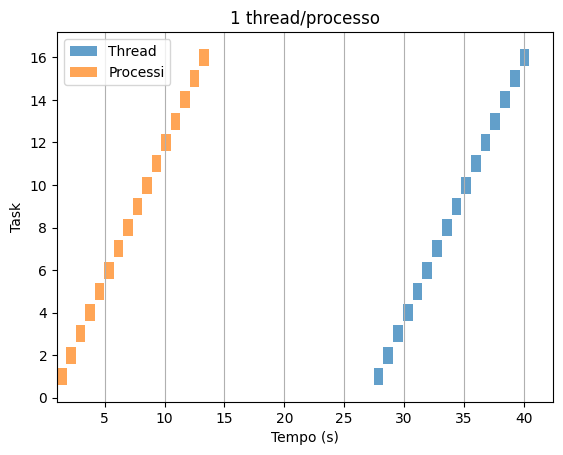

file saved reports/2_thread_processi.png


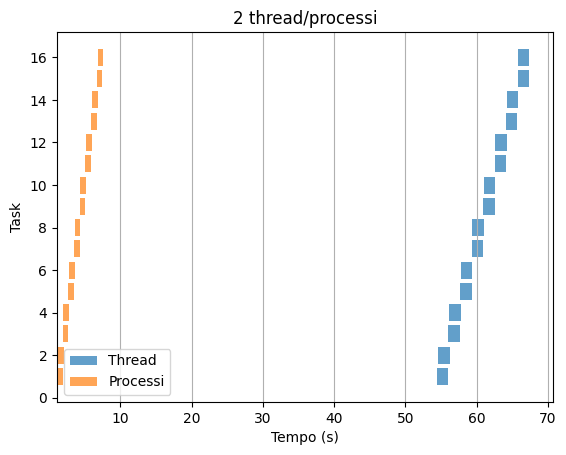

file saved reports/4_thread_processi.png


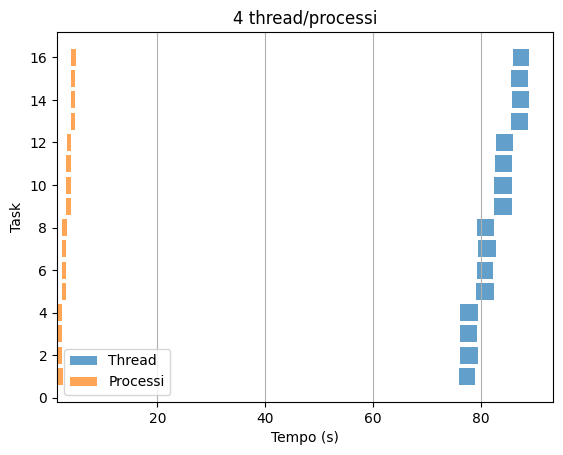

file saved reports/8_thread_processi.png


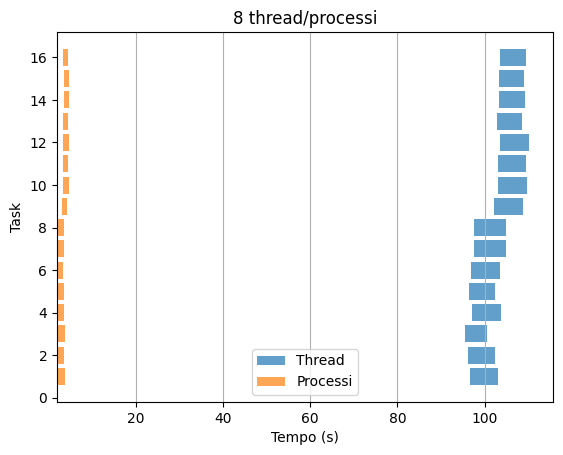

In [11]:
if __name__ == '__main__':
    cpu_bound_pesante()

### CPU bound - funzioni Numpy

In [12]:
# @tempo_di_esecuzione
# def addizione(array):
#     res = array[0] + array[1]

In [13]:
# import numpy as np
#
#
# def gil_unbound():
#     dimensione = 4000
#     num_test = 16  # numero di test da eseguire
#     dimensione_array = [dimensione for i in range(num_test)]
#     a = np.random.rand(dimensione, dimensione)
#     b = np.random.rand(dimensione, dimensione)
#     test = [(a, b) for i in range(num_test)]  # creo una lista di test da eseguire
#     esegui_thread_processi(addizione, test, grafico_combinato=True, lista_thread_processi=[1, 2, 4, 8])

file saved reports/1_thread_processo.png


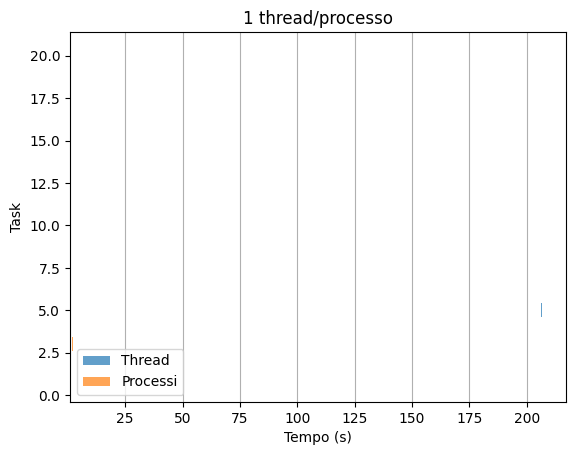

file saved reports/2_thread_processi.png


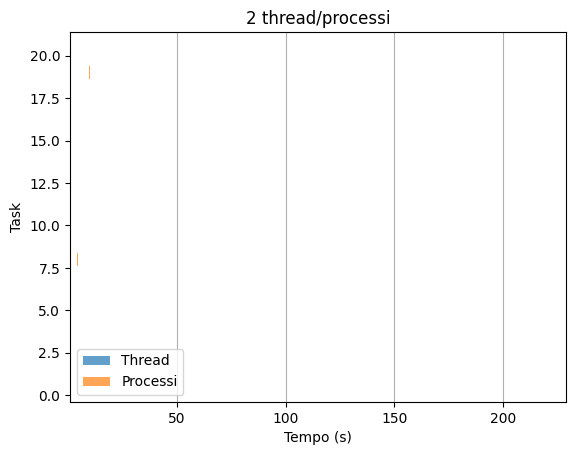

file saved reports/4_thread_processi.png


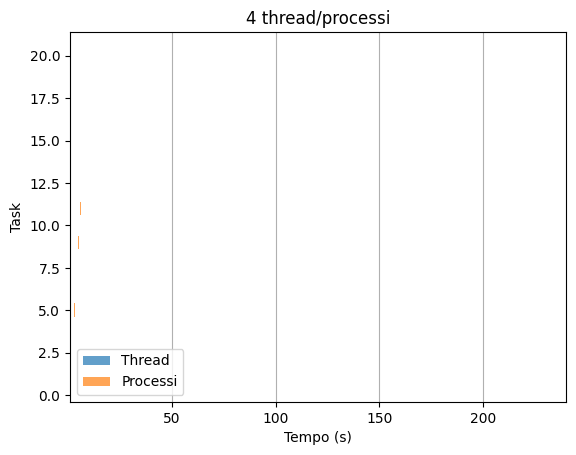

file saved reports/8_thread_processi.png


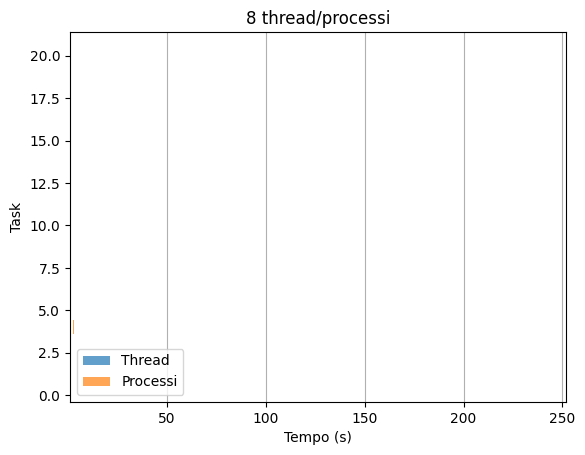

In [16]:
if __name__ == '__main__':
    gil_unbound()